In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("letter-recognition.data", header = None)
X = data.drop(0, axis = 1)

In [3]:
X = StandardScaler().fit_transform(X)

In [4]:
range_n_clusters = range(15,100)
inertia = []
silhouette = []
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters, n_jobs = -1, verbose = 3, random_state = 42) 
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    inertia.append(km.inertia_)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette.append(silhouette_avg)     

/home/alex/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/alex/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/alex/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Text(0, 0.5, 'inertia')

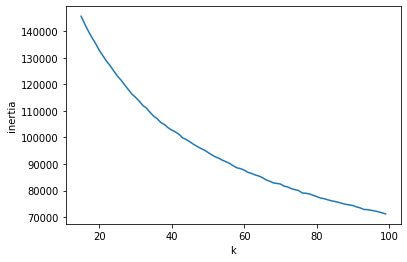

In [5]:
plt.plot(range_n_clusters, inertia)
plt.xlabel('k')
plt.ylabel('inertia')

Из графика инерции ничего содержательно не видно.

Text(0, 0.5, 'silhouette')

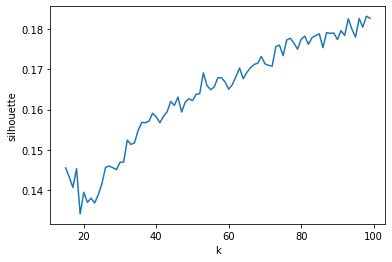

In [6]:
plt.plot(range_n_clusters,  silhouette)
plt.xlabel('k')
plt.ylabel('silhouette')

График silhouette не имеет доминирующего локального максимума.

Одна из математических интерпретаций метода "локтя" -  поиск индекса минимального члена в последовательности
$$D(k) = \frac{|J_k - J_{k+1}|}{|J_{k-1} - J_k|},$$
где $J_k$ - инерция на $k$-ом шаге.


In [7]:
x = np.array(inertia)
D = np.abs(x[2:]-x[1:-1]) / np.abs(x[1:-1]-x[:-2])

Text(0, 0.5, 'D')

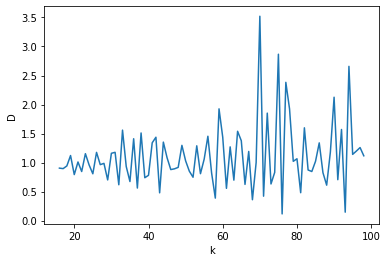

In [9]:
r = range_n_clusters[1:-1]
plt.plot(r,  D)
plt.xlabel('k')
plt.ylabel('D')

In [10]:
D.argmin()

60

### Итак, минимум $D(k)$ достигается в точке $k=60$, то есть наилучшее количество кластеров, которое нам удалось найти методом KMeans, равно $75$ ($=15+60$).